<a href="https://colab.research.google.com/github/aarsh121/Product_sales_campaign/blob/main/Product_sales_campaign.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Analysis Focus**
Six weeks ago Pens and Printers launched a new product line of office stationery. The company realized that despite the advancing digitalization of the business world, there is still a high demand for physical office stationery that cannot be replaced by digital alternatives.

The marketing strategy for the new product launch is to offer tools for brainstorming that reinforce creativity and focus.

Launching a new product line incurs high expenses and the company is looking for the best techniques to sell the new products most cost-effectively.

To analyze the initial results from the product launch campaign, a sales representative from Pens and Printers provided a dataset from the company's sales tracking system. These data serve as the basis for current analysis of the applied new product sales methods.

For the new product line launch Pens and Printers applied three different sales strategies to three different customer groups.

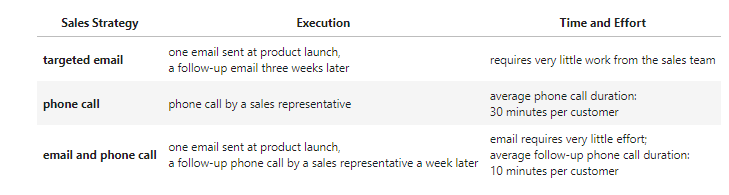

This data analysis aims at answering the following questions about Pens and Printers' latest sales campaign:



*   How many customers were there for each sales approach?
*   What does the spread of the revenue look like overall? And for each method?
*   Was there any difference in revenue over time for each of the sales methods?
*   Based on the data (time, effort, results per sales strategy), which method would you recommend we continue to use?
*   Provide context about customer groups, an overview of what is going on, and what to do next.




In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:
df=pd.read_csv('product_sales.csv')
df.head()


,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
0,2,Email,2e72d641-95ac-497b-bbf8-4861764a7097,10,NaN,0,24,Arizona
1,6,Email + Call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.47,1,28,Kansas
2,5,Call,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.55,6,26,Wisconsin
3,4,Email,78aa75a4-ffeb-4817-b1d0-2f030783c5d7,11,NaN,3,25,Indiana
4,3,Email,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.49,0,28,Illinois


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               15000 non-null  int64  
 1   sales_method       15000 non-null  object 
 2   customer_id        15000 non-null  object 
 3   nb_sold            15000 non-null  int64  
 4   revenue            13926 non-null  float64
 5   years_as_customer  15000 non-null  int64  
 6   nb_site_visits     15000 non-null  int64  
 7   state              15000 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 937.6+ KB


In [ ]:
df.sales_method.unique()

array(['Email', 'Email + Call', 'Call', 'em + call', 'email'],
      dtype=object)

In [ ]:
df.isnull().sum()

week                    0
sales_method            0
customer_id             0
nb_sold                 0
revenue              1074
years_as_customer       0
nb_site_visits          0
state                   0
dtype: int64

In [ ]:
print(df['sales_method'].value_counts().sort_index())

Call            4962
Email           7456
Email + Call    2549
em + call         23
email             10
Name: sales_method, dtype: int64


In [ ]:
df['sales_method']=df['sales_method'].str.replace('em + call', 'Email + Call', regex=False)
df['sales_method']=df['sales_method'].str.replace('email','Email')
print(df['sales_method'].value_counts().sort_index())


Call            4962
Email           7466
Email + Call    2572
Name: sales_method, dtype: int64


In [ ]:
print(df['week'].unique())
print(df['week'].value_counts())

[2 6 5 4 3 1]
1    3721
4    2575
5    2574
2    2491
3    2411
6    1228
Name: week, dtype: int64


In [ ]:
print(df['customer_id'].dtype)
print(df['customer_id'].apply(len))
df['customer_id'].duplicated().any()

object
0        36
1        36
2        36
3        36
4        36
         ..
14995    36
14996    36
14997    36
14998    36
14999    36
Name: customer_id, Length: 15000, dtype: int64


False

In [ ]:
df['nb_sold'].value_counts().sort_index()

7      698
8     1941
9     3535
10    3677
11    2439
12    1088
13     939
14      97
15     555
16      31
Name: nb_sold, dtype: int64

In [ ]:
df.corr(numeric_only=True)

,week,nb_sold,revenue,years_as_customer,nb_site_visits
week,1.000000,0.809887,0.356179,-0.082334,0.419038
nb_sold,0.809887,1.000000,0.696165,-0.099117,0.490718
revenue,0.356179,0.696165,1.000000,-0.064696,0.323089
years_as_customer,-0.082334,-0.099117,-0.064696,1.000000,-0.048860
nb_site_visits,0.419038,0.490718,0.323089,-0.048860,1.000000


In [ ]:
missing_val=df['revenue'].isnull().sum()
print(missing_val)

print(df[df['revenue'].isna()]['nb_sold'].value_counts())

1074
10    253
9     219
11    163
12    127
8     103
15     94
13     93
7      17
14      4
16      1
Name: nb_sold, dtype: int64


In [ ]:
#data imputation for missing values

imp_mean={}
keys=(7,16)

for k in range(7,17):
  imp_mean[k]=round(np.mean(df[df['nb_sold'] == k]['revenue']), 2)

imp_mean



{7: 35.09,
 8: 64.53,
 9: 79.17,
 10: 91.03,
 11: 88.44,
 12: 170.16,
 13: 125.85,
 14: 91.64,
 15: 226.83,
 16: 234.14}

In [ ]:
df['revenue']=df['revenue'].fillna(df['nb_sold'].map(imp_mean))
df['revenue'].isna().sum()

0

In [ ]:
df.head()

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
0,2,Email,2e72d641-95ac-497b-bbf8-4861764a7097,10,91.03,0,24,Arizona
1,6,Email + Call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.47,1,28,Kansas
2,5,Call,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.55,6,26,Wisconsin
3,4,Email,78aa75a4-ffeb-4817-b1d0-2f030783c5d7,11,88.44,3,25,Indiana
4,3,Email,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.49,0,28,Illinois


In [ ]:
df['years_as_customer'].value_counts()

1     2504
2     1987
3     1619
0     1471
4     1338
5     1118
6      918
7      709
8      608
9      509
10     405
11     318
12     284
13     239
14     167
15     150
16     123
17      88
18      82
19      58
20      54
22      43
21      37
24      27
26      22
23      21
25      19
27      15
30       9
33       8
34       8
28       8
31       6
32       5
29       5
35       5
36       4
39       3
38       2
37       2
63       1
47       1
Name: years_as_customer, dtype: int64

In [ ]:
df['years_as_customer']=df['years_as_customer'].replace(47,37).replace(63, 36)

In [ ]:
df['years_as_customer'].value_counts().sort_index()
df['years_as_customer'].agg(['min','max'])

min     0
max    39
Name: years_as_customer, dtype: int64

In [ ]:
#EDA

df.groupby('sales_method').agg(ncust=('customer_id','count')).sort_values('ncust', ascending=False).assign(p_cust=lambda x:x.ncust/sum(x.ncust))

,ncust,p_cust
sales_method,,
Email,7466,0.497733
Call,4962,0.330800
Email + Call,2572,0.171467


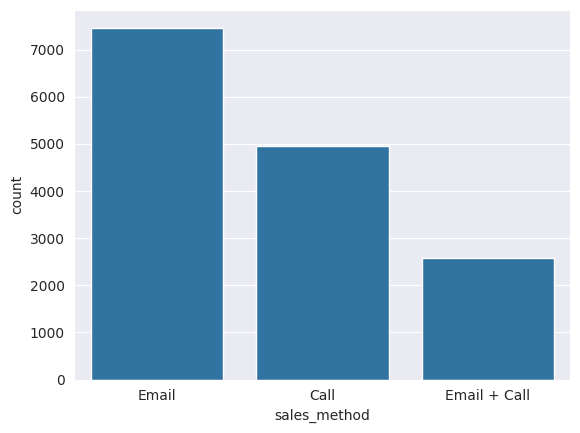

In [ ]:
sns.set_style('darkgrid')
sns.countplot(data=df, x='sales_method', order=['Email', 'Call', 'Email + Call'])
plt.show()

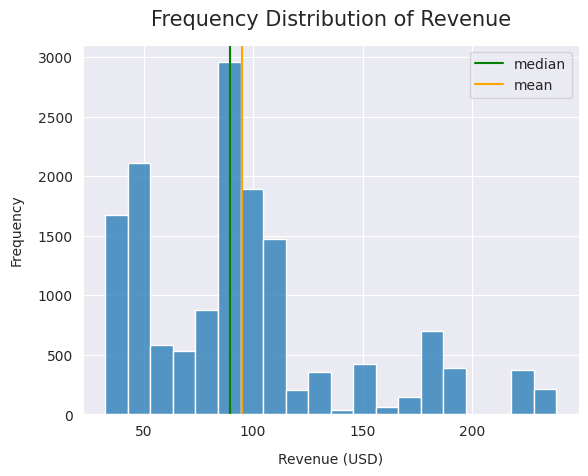

In [ ]:
sns.histplot(data=df, x='revenue', bins=20)
plt.axvline(x=df.revenue.median(), color='green', label='median')
plt.axvline(x=df.revenue.mean(), color='orange', label='mean')
plt.title("Frequency Distribution of Revenue",
          y=1.03,
          fontsize=15)
plt.xlabel("Revenue (USD)", labelpad=10)
plt.ylabel("Frequency", labelpad=10)
plt.legend()
plt.show()

In [ ]:
df['revenue'].agg(revenue_mean='mean', revenue_median='median')

revenue_mean      95.026851
revenue_median    89.660000
Name: revenue, dtype: float64

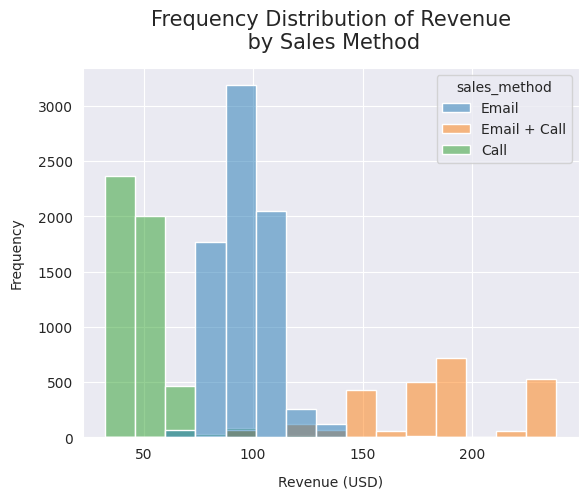

In [ ]:
sns.histplot(data=df, x='revenue', hue='sales_method', bins=15)
plt.title("Frequency Distribution of Revenue\n by Sales Method",
          y=1.03,
          fontsize=15)
plt.xlabel("Revenue (USD)", labelpad=10)
plt.ylabel("Frequency", labelpad=10)
plt.show()

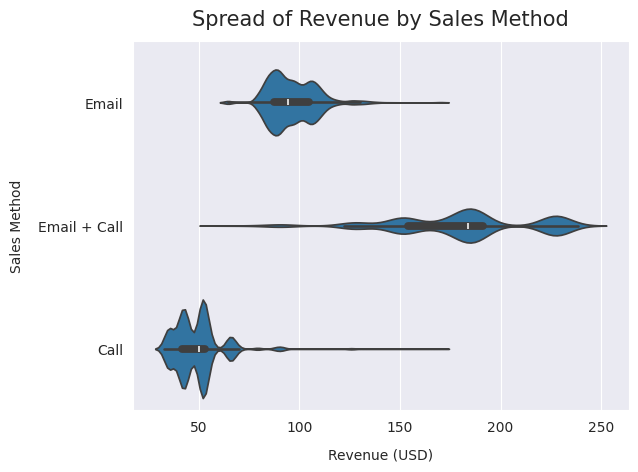

In [ ]:
sns.violinplot(data=df, x='revenue', y='sales_method')
plt.title("Spread of Revenue by Sales Method",
          fontsize=15,
          y=1.02)
plt.xlabel("Revenue (USD)", labelpad=10)
plt.ylabel("Sales Method", labelpad=10)
plt.show()
plt.show()

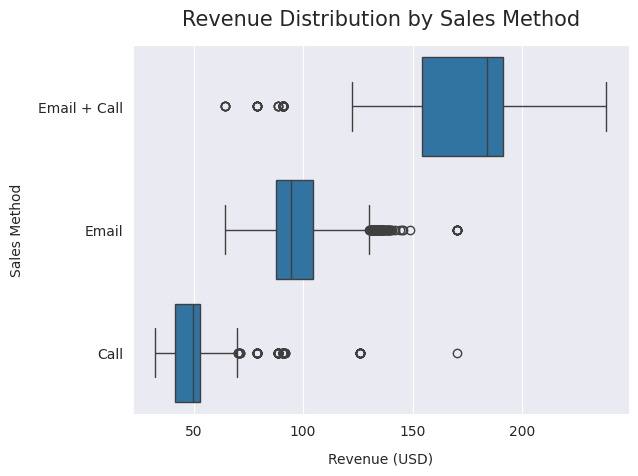

In [ ]:
# Visualize the frequency distribution with a box plot.
sns.boxplot(data=df,
            x='revenue',
            y='sales_method',
            order=['Email + Call', 'Email', 'Call'],
           )
plt.title("Revenue Distribution by Sales Method",
          y=1.03,
          fontsize=15)
plt.xlabel("Revenue (USD)",
           labelpad=10)
plt.ylabel("Sales Method",
           labelpad=10)
plt.show()

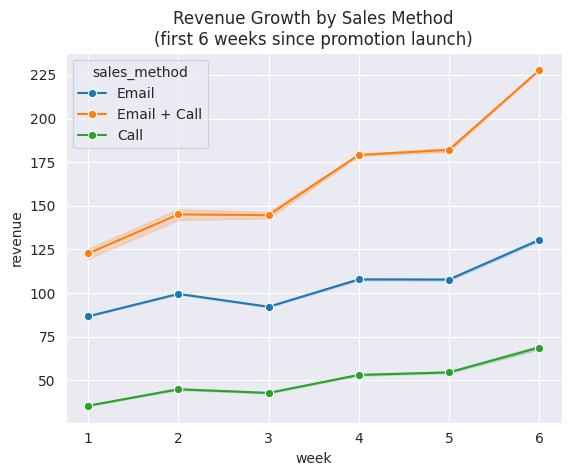

In [ ]:
sns.lineplot(data=df, y='revenue', hue='sales_method', x='week',marker='o')
plt.title('Revenue Growth by Sales Method\n(first 6 weeks since promotion launch)')
plt.show()

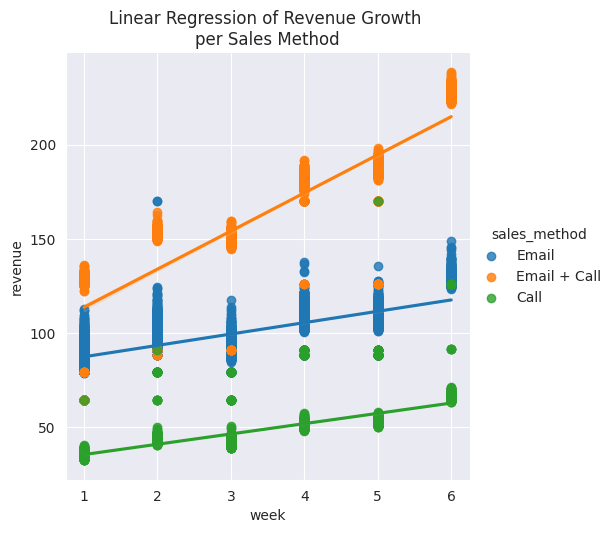

In [ ]:
sns.lmplot(data=df, x='week', y='revenue', hue='sales_method')
plt.title("Linear Regression of Revenue Growth \nper Sales Method")
plt.show()

In [ ]:
from scipy import stats
lreg_call=stats.linregress(df[df['sales_method']=='Call']['week'], df[df['sales_method']=='Call']['revenue'])
print(lreg_call)

lreg_email=stats.linregress(df[df['sales_method']=='Email']['week'], df[df['sales_method']=='Email']['revenue'])
print(lreg_email)

lreg_emcall=stats.linregress(df[df['sales_method']=='Email + Call']['week'], df[df['sales_method']=='Email + Call']['revenue'])
print(lreg_emcall)

LinregressResult(slope=5.462615288269871, intercept=30.144380263771797, rvalue=0.741374922819101, pvalue=0.0, stderr=0.07021070685971038, intercept_stderr=0.2644683054632196)
LinregressResult(slope=6.030197032134784, intercept=81.44465817166184, rvalue=0.7436598013272415, pvalue=0.0, stderr=0.0627495501852309, intercept_stderr=0.1807916613498633)
LinregressResult(slope=20.226153543596716, intercept=93.4946373195099, rvalue=0.8575459098945243, pvalue=0.0, stderr=0.23932970084008875, intercept_stderr=1.0839811763380687)


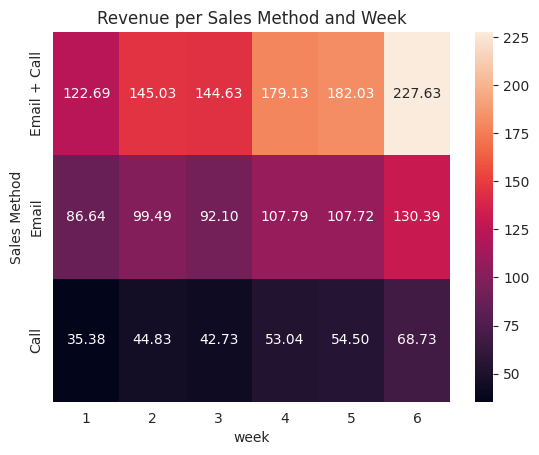

In [ ]:
pivot_table=df.pivot_table(values='revenue', index='sales_method', columns='week')

sns.heatmap(data=pivot_table.sort_values('sales_method',ascending=False), annot=True, fmt='.2f')
plt.title("Revenue per Sales Method and Week")
plt.ylabel("Sales Method")
plt.show()

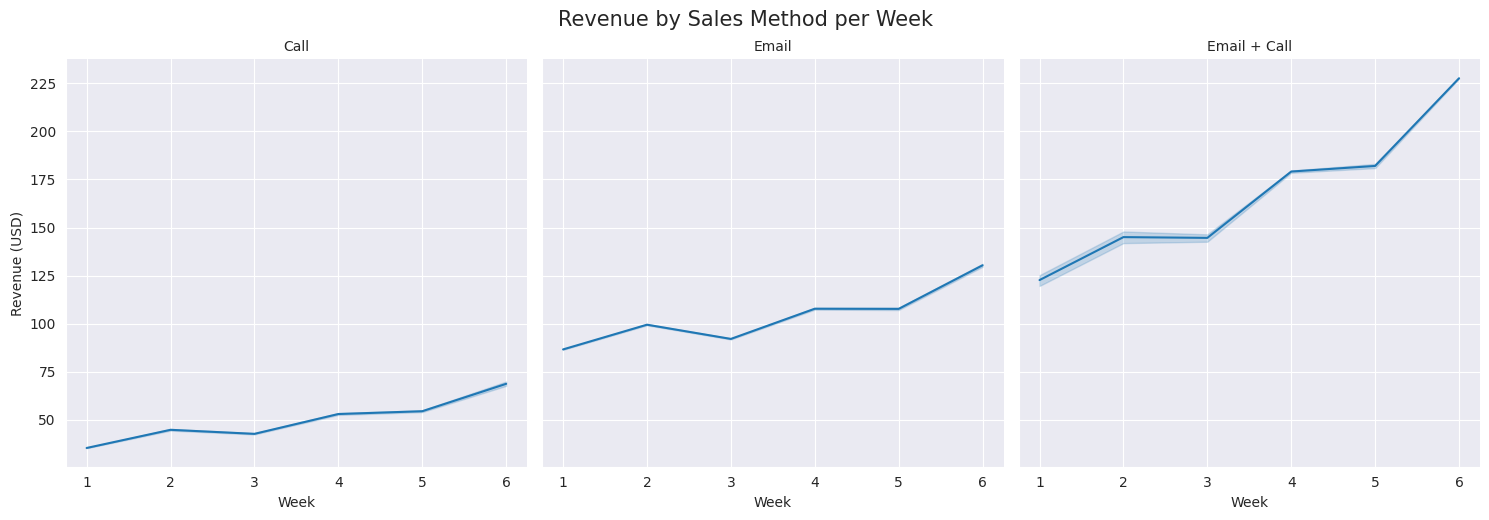

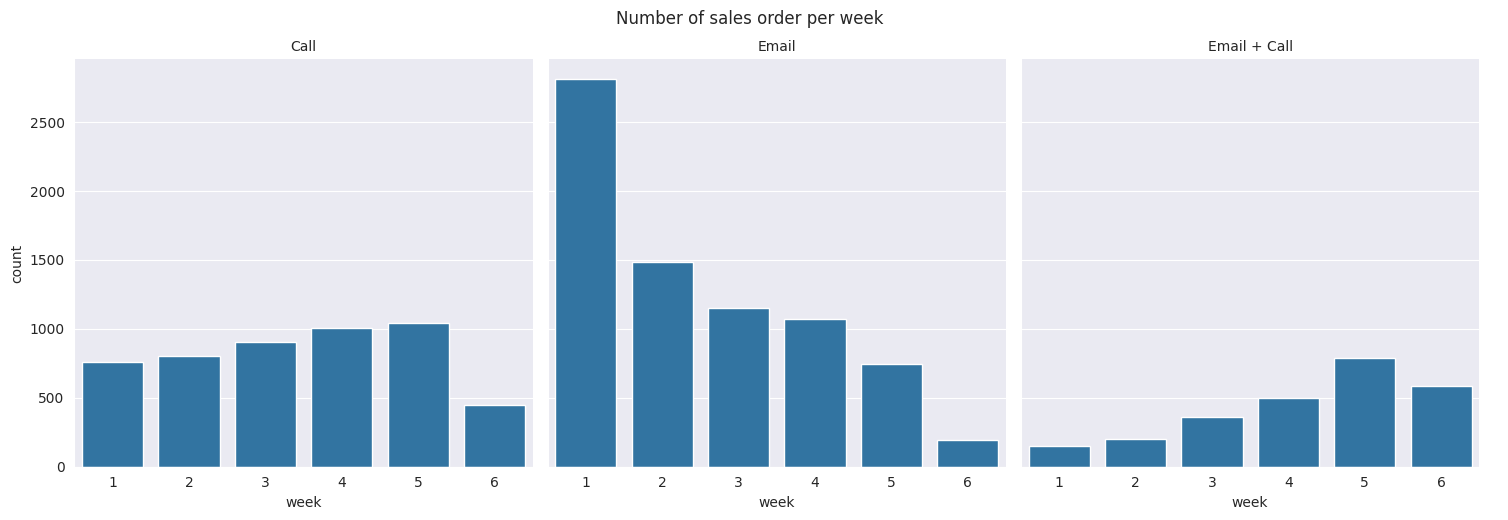

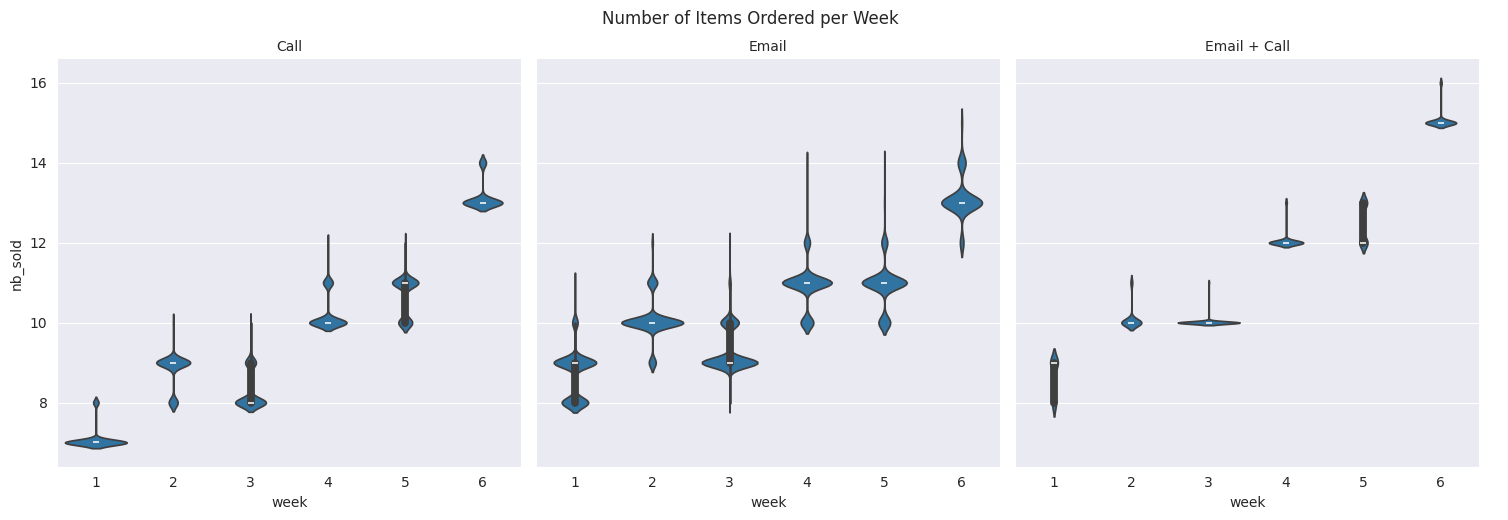

In [ ]:
g1= sns.relplot(data=df, x='week',y='revenue', col='sales_method',col_order=['Call', 'Email', 'Email + Call'], kind='line')
g1.fig.suptitle("Revenue by Sales Method per Week",
                 fontsize=15,
                 y=1.03)
g1.set_titles("{col_name}")
g1.set(xlabel="Week",
	   ylabel="Revenue (USD)")


g2=sns.catplot(data=df, kind='count', x='week', col='sales_method', col_order=['Call', 'Email', 'Email + Call'])
g2.fig.suptitle("Number of sales order per week", y=1.03)
g2.set_titles("{col_name}")


g3=sns.catplot(data=df, kind='violin', x='week',y='nb_sold', col='sales_method', col_order=['Call', 'Email', 'Email + Call'])
g3.fig.suptitle("Number of Items Ordered per Week", y=1.03)
g3.set_titles("{col_name}")

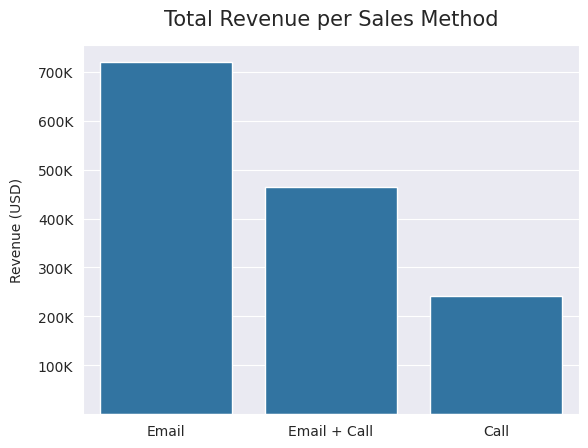

In [ ]:
sns.barplot(data=df, x='sales_method', y='revenue',estimator='sum',errorbar=None)
plt.title("Total Revenue per Sales Method",
          fontsize=15,
          y=1.03)
plt.xlabel("")
plt.ylabel("Revenue (USD)", labelpad=10)
plt.yticks([100000, 200000, 300000, 400000, 500000, 600000, 700000],
           ["100K", "200K", "300K", "400K", "500K", "600K", "700K"])
plt.show()

In [ ]:
df.groupby('sales_method').agg(total_rev=('revenue','sum')).assign(pct_of_revenue= lambda x: round(x.total_rev)/sum(x.total_rev,2)).sort_values('total_rev', ascending=False)


,total_rev,pct_of_revenue
sales_method,,
Email,719226.47,0.504577
Email + Call,463724.49,0.325328
Call,242451.80,0.170093


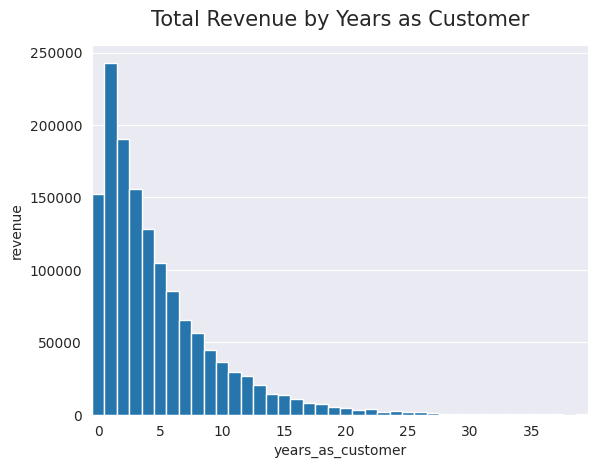

In [ ]:
sns.barplot(data=df,
            x='years_as_customer',
            y='revenue',
            estimator='sum',
            errorbar=None,
            width=1,
            saturation=0.9
            )
plt.title("Total Revenue by Years as Customer",
          y=1.03,
          fontsize=15)
plt.xticks(range(0, 39, 5))
plt.show()

In [ ]:
# Explore customer base geographically.
revenue_vs_clients = df.groupby('state').agg(total_revenue = ('revenue', 'sum'),
                            number_clients = ('customer_id', 'count')).sort_values(['total_revenue', 'number_clients'], ascending = [False, False])
print(revenue_vs_clients)

# Average revenue per client
revenue_per_client = revenue_vs_clients.assign(revenue_per_client = revenue_vs_clients['total_revenue']/revenue_vs_clients['number_clients']).reset_index()

# Top 10 US states with highest revenues
print(revenue_per_client.sort_values('total_revenue', ascending=False).head(10))

# Top 10 US states with highest revenue per client
print(revenue_per_client.sort_values('revenue_per_client', ascending=False).head(10))

revenue_per_client.sort_values('total_revenue', ascending=False).head(10)['total_revenue'].sum() / revenue_per_client.sort_values('total_revenue', ascending=False)['total_revenue'].sum()

                total_revenue  number_clients
state                                        
California          175710.99            1872
Texas               114021.72            1187
New York             90025.06             965
Florida              86518.56             904
Illinois             56990.35             617
Pennsylvania         56153.94             598
Ohio                 52759.74             566
Michigan             47952.04             498
Georgia              46952.66             489
North Carolina       41748.56             459
New Jersey           39907.06             434
Virginia             36663.53             372
Indiana              33709.47             354
Washington           33204.27             335
Tennessee            31468.00             340
Arizona              29907.36             321
Missouri             29239.36             311
Massachusetts        27771.06             294
Maryland             24897.51             263
Wisconsin            24110.31     

0.5393799153300363

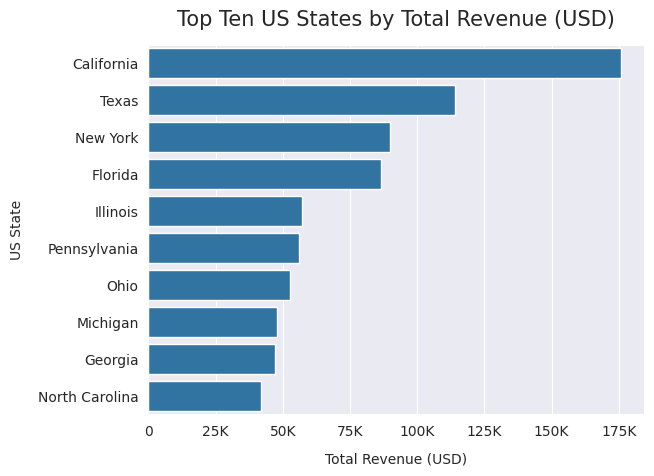

In [ ]:
# Top ten states by Total Revenue.
sns.barplot(data=revenue_per_client.head(10),
            x='total_revenue',
            y='state')
plt.title("Top Ten US States by Total Revenue (USD)",
          fontsize=15,
          y=1.03)
plt.xlabel("Total Revenue (USD)", labelpad=10)
plt.ylabel("US State", labelpad=10)
plt.xticks([0, 25000, 50000, 75000, 100000, 125000, 150000, 175000],
           ["0", "25K", "50K", "75K", "100K", "125K", "150K", "175K"])
plt.show()